In [1]:
import pandas as pd
import os
import seaborn as sns 

import matplotlib.pyplot as plt
cwd = os.getcwd()


In [ ]:
df = pd.read_excel('../data/EPT_DEA/EPT 1994-2022 med varmelager.xlsx', sheet_name='RawData')

In [53]:
cdf = df[['Vaerk_ID', 'År', 'Anlægstype_navn','Værk_Kommune', 'Varmeprod_TJ','Brændselsfrit_TJ', 'VrkTypeID']] 

In [54]:
total= cdf.groupby(['År'])['Varmeprod_TJ'].sum().reset_index() #'Vaerk_ID'
total.rename(columns={'Varmeprod_TJ':'total_vaerk_varmeprod'}, inplace= True)
total['total_vaerk_varmeprod_PJ'] = total['total_vaerk_varmeprod']/1000

In [ ]:
names = pd.read_excel('../data/EPT_DEA/6_ept_produktions-_og_forbrugsdata_2021-2023.xlsx', sheet_name='EPT2021-2023')
names = names[['vaerk_id', 'aar', 'vaerk_navn']]
names= names[names['aar']==2022]

In [63]:
eh = cdf[ (cdf ['Brændselsfrit_TJ']>0) & (cdf ['VrkTypeID']=='ER')]
#eh = eh.merge( names, left_on='Vaerk_ID', right_on='vaerk_id')
#eh[eh['Anlægstype_navn']=='Varmepumpe Oversku']
eh.to_excel('eh.xlsx')

In [64]:
eh = eh.groupby(['År']).agg({'Varmeprod_TJ':'sum', 'Vaerk_ID':'nunique', }).reset_index()
eh.rename(columns={'Varmeprod_TJ':'eh_varmeprod', 'Vaerk_ID':'Count of units', 'vaerk_navn':'Count of companies'}, inplace= True)


105925.48382201092

In [60]:
joined = total.merge(eh, left_on = 'År' , right_on='År')


In [ ]:
joined

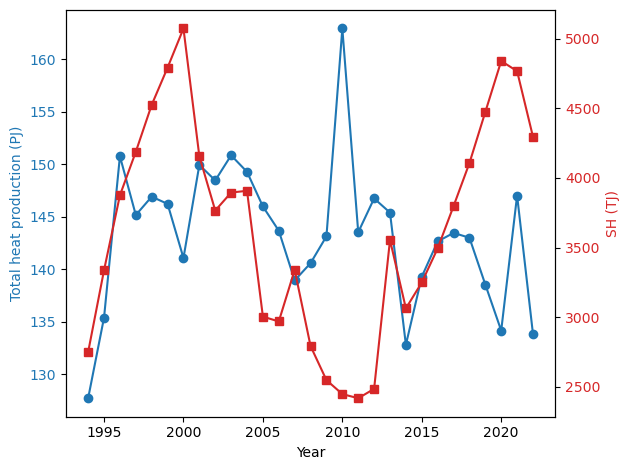

In [61]:
# Create figure and axis
fig, ax1 = plt.subplots()

# Left y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Total heat production (PJ)', color='tab:blue')
ax1.plot(joined['År'].unique(), joined['total_vaerk_varmeprod_PJ'], marker='o', color='tab:blue', label='total_vaerk_varmeprod_PJ')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('SH (TJ)', color='tab:red')
ax2.plot(joined['År'].unique(), joined['eh_varmeprod'], marker='s', color='tab:red', label='eh_varmeprod')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.show()